In [1]:
from utilities import *
from preprocessing import *

libri_train ="E:\Datasets\Voice\LibriSpeech"

C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\torchaudio\extension\extension.py:13: UserWarning: torchaudio C++ extension is not available.
  warnings.warn('torchaudio C++ extension is not available.')
C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\torchaudio\backend\utils.py:46: UserWarning: "torchaudio.USE_SOUNDFILE_LEGACY_INTERFACE" flag is deprecated and will be removed in 0.9.0. Please remove the use of flag.
  warnings.warn(
C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\transformers\models\wav2vec2\tokenization_wav2vec2.py:417: FutureWarning: The class `Wav2Vec2Tokenizer` is deprecated and will be removed in version 5 of Transformers. Please use `Wav2Vec2Processor` or `Wav2Vec2CTCTokenizer` instead.
  warnings.warn(
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it f

In [2]:
clips =fcs.get_audio_files(libri_train)
sr = 22000
hop_length = int(sr/200)
frame_length = int(hop_length*2.5)
min_duration=hop_length*10
min_voiced_duration_ms = 500
energy_threshold = 0.05

(12, 2) 19 THE BARONESS BECAME PALE YOU WERE SAYING THIS WERE YOU NOT WELL I OWN IT I WILL ANSWER YOU [[ 12210  14190]
 [ 14740  22440]
 [ 23650  25630]
 [ 27610  31020]
 [ 31790  38610]
 [ 78100  84590]
 [ 85030  94930]
 [ 95700 107910]
 [108790 109340]
 [130240 136730]
 [137720 147400]
 [178970 194810]]
[ 3  8 10 13 15 18 20 22 25 28 30 33 36 38 41 43 45 47 49 51 53 67 73 75
 81]
[[   0  990]
 [ 990 1980]
 [1980 3080]
 [3080 4180]
 [4180 5280]
 [5280 6270]
 [6270 7370]
 [7370 8470]
 [8470 9790]] (9900,)


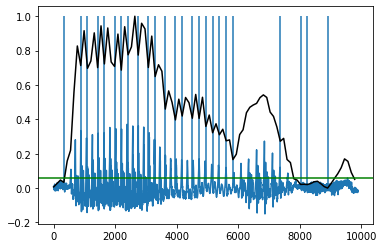

In [28]:
clip = clips[170]
transcript = load_clip_transcription(clip)
audio,sr = librosa.load(clip, sr)
segments  = split_segments(audio, hop_length, frame_length, sr, energy_threshold=energy_threshold , min_duration= min_voiced_duration_ms)
print(segments.shape , len(transcript.split(" ")), transcript , segments)

cc = 6
segment = audio[segments[cc][0]:segments[cc][1]]

f = normalize(librosa.feature.rms(np.abs(segment), hop_length=hop_length, frame_length=frame_length)[0])
m = signal.argrelmin(f)[0]
print(m)
plt.plot(segment)
plt.plot(np.arange(0,len(segment), hop_length ) , f,'k')
plt.axhline(0.06, c='g')
plt.vlines(m*hop_length,0,1)

seg_bits= Split3(segment,hop_length=hop_length,sr= sr,min_duration=45 )
seg_bits = np.array(seg_bits)#+segments[0][0]
trimmed_audio = clip_from_segments(audio, segments)
print(seg_bits, segment.shape)
ipd.Audio(trimmed_audio,rate=sr)

In [4]:
clip = clips[170]
transcript = load_clip_transcription(clip)
print(transcript)
audio,sr = librosa.load(clip, sr)
hl = int(sr/200)
fl= int(hl*2)
segments = split_segments(audio, hl, fl ,sr)
all_bits = []
for seg in segments:
    s,e= seg[0], seg[1]
    seg_audio = audio[s:e]
    bits = Split_into_phonemes(seg_audio,sr)
    all_bits.extend(bits)
    

THE BARONESS BECAME PALE YOU WERE SAYING THIS WERE YOU NOT WELL I OWN IT I WILL ANSWER YOU


IndexError: list index out of range

In [27]:
len(segment),s , e

(9900, 13200, 14190)

In [14]:
seg_bits[1][0]

13200

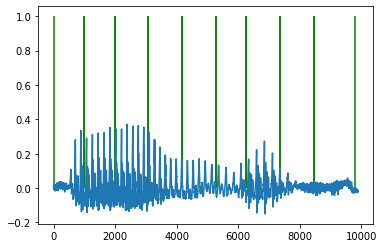

In [37]:
hl = hop_length+50
fl = int(hl*2)
c = 1
s = seg_bits[c][0]
e = seg_bits[c+1][1]
plt.plot(segment)
plt.vlines(seg_bits,0,1,'g')

ipd.Audio(segment[s:e], rate=sr)

(62,) 16


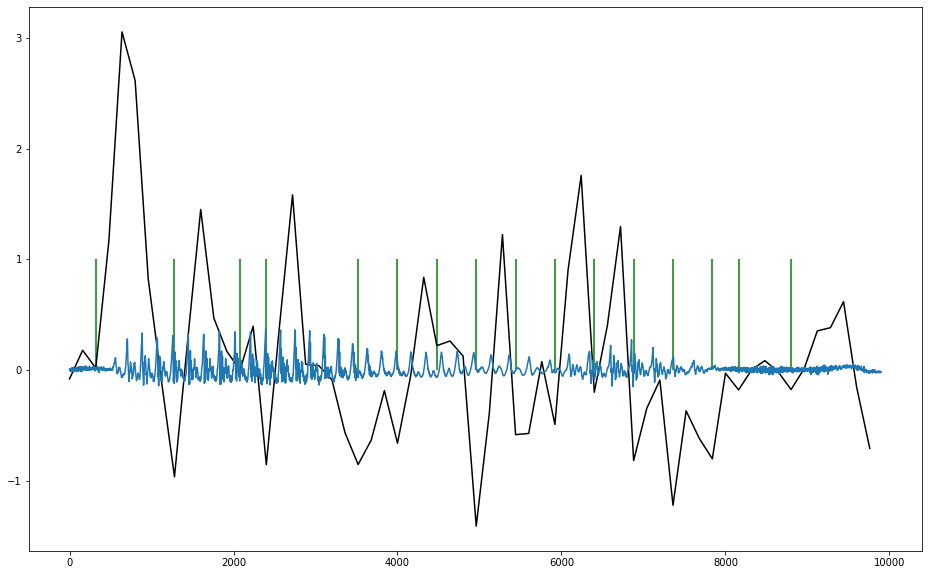

In [39]:
sec_energy = normalize(librosa.feature.rms(np.abs(segment), hop_length=hl, frame_length=fl)[0])
sec_energy = librosa.effects.preemphasis(sec_energy)
mins =  signal.argrelextrema(sec_energy, np.less)[0]*hl
print(sec_energy.shape, len(mins) )
plt.figure(figsize=(16,10))
plt.plot(np.arange(0,len(segment)+1, hl ) , sec_energy*8,'k')
plt.plot(segment)
plt.vlines(mins,0,1,'g')
bit= segment
ipd.Audio(segment, rate =sr)

ipd.Audio(segment[mins[6]:mins[9]],rate=sr)#print(sec_energy)


0.007507089
0.007400691
0.007680001
0.006154917
0.0066306335
-0.008414833
0.016858323
0.012162086
0.004031709
0.0047510467
0.0053939293
0.009268745
0.0061727543
0.011652127
0.0020216084


 ['ðə', 'b', 'æ', 'ɹ', 'əʊ', 'n', 'ə', 's'] 8 16
15 16 0.8141808236801596 0.49248072104479057 [0.62999343 0.62578351 0.63683516 0.57649114 0.59531412 0.
 1.         0.81418082 0.49248072 0.52094324 0.54638061 0.69969806
 0.57719691 0.79400294 0.41294572]
new_mins [4000, 6400, 7360] 
 [ 320 1280 2080 2400 3520 4000 4480 4960 5440 5920 6400 6880 7360 7840
 8160 8800]


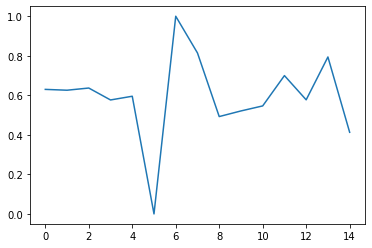

In [23]:
#np.arange(0,len(trimmed_audio)+1, hop_length )
means =[]
for x in range(0, len(mins)-1):
    means.append(np.mean(segment[mins[x]:mins[x+1]]))
    print(np.mean(segment[mins[x]:mins[x+1]]))
means= normalize(means)
plt.plot(means)
phones = all_phones_to_array('the baroness')
print("\n\n",all_phones_to_array('the baroness'), len(phones), len(mins))
print(len(means), len(mins) ,means[7], means[8], means)
new_mins = []
for x in range(0,len(means)-1):
    diff = means[x+1] - means[x]
    if diff >= 0.06:
        new_mins.append(mins[x])
print("new_mins" , new_mins, "\n", mins)

ipd.Audio(segment[new_mins[2]:len(segment)],rate=sr)

In [ ]:

# get RMS energy and apply preemphasis filter
hop_length = int(sr/250)
frame_length = int(hop_length*2.5)
mins = [0]
sec_energy = librosa.feature.rms(np.abs(segment), hop_length=hop_length, frame_length=frame_length)[0]
sec_energy = librosa.effects.preemphasis(sec_energy)
mins.extend(signal.argrelmin(sec_energy)[0]*hop_length)
mins, means

In [ ]:
expected_phoneme_count = 8

temp_mins = [0]
means = []
for x in range(0, len(mins)-1):
    means.append(np.mean(segment[mins[x]:mins[x+1]]))
means= normalize(means)
for x in range(0,len(means)-1):
    diff = means[x+1] - means[x]
    if diff >= 0.10:
        temp_mins.append(mins[x])
mins = temp_mins
mins = np.array(mins)
mins

In [ ]:
tups = []

# if too short to have at least 2 subsections
if (len(mins) > 0 or len(maxs)> 0) and len(segment)/sr < 2*min_duration/1000 :
    return [(0,len(segment))]
if len(mins)==1 and mins[0] < len(segment)/hop_length/3 and len(maxs)==1 and len(segment)/hop_length/3 < maxs[0] <len(audio)/hop_length/3*2:
    tups.append((0,maxs[0]))
    tups.append((maxs[0], math.ceil(len(segment)/hop_length)))
    return  np.array(tups)*hop_length
#mins = [*mins,*maxs]
mins.tolist().append( math.ceil(len(segment)/hop_length))
mins.sort()


# not enough usable peaks or valleys detected
if len(mins)<=1:
    if len(maxs)==2:
        tups.append((maxs[0], maxs[1]))
    elif mins[0] < 1 and (mins[0] * hop_length )/ sr < min_duration / 1000:
        tups.append((0, mins[0]))
    elif mins[0] < 1 and ((mins[0] * hop_length )-len(audio))/ sr < min_duration / 1000:
        tups.append((mins[0], len(audio)))
    elif len(maxs)==1 and maxs[0]!=0 and (maxs[0] * hop_length )/ sr < min_duration / 1000:
        tups.append((0,maxs[0]))
    elif len(maxs)>2:
        mins = maxs
    else:
        return [()]
# create tuples for subsections
for i in range(len(mins)-1):
    #distance between next two valleys less than min_duration
    if (mins[i+1]-mins[i])*hop_length/sr < min_duration/1000 :
        # if shorter than min and this is the last valley, add it to the last segment
        if i == len(mins)-1:
            tups[-1] = (tups[-1][0], mins[i])
        #if not first segment and previous segment is shorter than minimum duration, add it to the last segment
        if len(tups) >= 1 and (tups[-1][1]- tups[-1][0])*hop_length/sr < min_duration/1000 :
            tups[-1] = (tups[-1][0], mins[i])
        #if previous segment is long enough start a new segment
        elif len(tups) >= 1:
            tups.append(  (tups[-1][1], mins[i]))
        #else this is the first segment
        else:
            tups.append((0, mins[i]))

    #if distance between next 2 valleys is the >= min duration
    elif  (mins[i+1]-mins[i])*hop_length/sr >= min_duration/1000 :
        # if previous segment is too short append it
        if len(tups)>0 and tups[-1][1]-tups[-1][0]*hop_length/sr > min_duration/1000:
            tups[-1] = ( tups[-1][0], mins[i])
        #else create a new segment with next 2 valleys
        else:
            tups.append((mins[i], mins[i+1]))
    # this code should never be reached
    else:
        try:
            tups.append((tups[-1][1], mins[i]) )
        except:
            if mins[i] !=0 and mins[i]*hop_length/sr < min_duration/1000:
                tups.append((0, mins[i+1] ))
#handle final value
if (mins[-1]-mins[-2])*hop_length/sr> min_duration:
    tups.append((mins[-2],mins[-1]))
if (tups[-1][1]-tups[-1][0])*hop_length/sr < min_duration/1000 or(mins[-1]-mins[-2])*hop_length/sr < min_duration/1000:
    tups[-1]= (tups[-1][0],mins[-1])
else:
    tups.append( (tups[-1][1], mins[-1]))

np.array(tups)*hop_length



In [6]:
a =[1,3,4,5,8,11,12,15]
print(np.where(a,a>3))

TypeError: '>' not supported between instances of 'list' and 'int'